# Recurrent Neural Network (RNN)
## Goal of lesson
##  1: Understand Recurrent Neural Network (RNN)
##  2: Build a RNN on a timeseries
##  3 :Hover over the theory of RNN (LSTM cells)
##  4: Use the MinMaxScaler from sklearn.
##  5: Create a RNN model with tensorflow
##  6: Applying the Dropout techniques.
##  7: make weather forecast using RNN.
## Feed-Forward Neural Network
##  1 : Neural network that has connection only in one direction
## Recurrent Neural Network
## 1 :Neural network that generates output that feeds back into its own inputs
## 2: Can do one-to-many and many-to-many relationship (not possible for feed-forward neural networks)
## 3: This can generate sentences (while feed-forward neural network can only generate "words" or fixed sets of outputs)
## 4: For time series

# Examples Recurrent Neural Network
## 1: Google translate
## 2: Voice recognition
## 3: Video copy right violation
## 4: Theory
## 5: It is complex - and luckily - not needed to understand in depth
"You don't need to understand everything about the specific architecutre of an LSTM cell [...] just that LSTM cell is meant to allow past information to be reinjected at a later time."

In [1]:
# Importing some libraies
from time import time
import random
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#Reading Data
df = pd.read_csv("weatherHistory.csv")

# EDA

In [3]:

df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
#some preprocessing then setting our data into train and test

In [8]:
df_1 = df.get('Temperature (C)')

In [9]:

data_train = df_1.loc[:96000].to_numpy()
data_test = df_1.loc[96000:].to_numpy()

In [10]:
data_train.shape

(96001,)

In [11]:
data_test.shape

(453,)

In [12]:
data_train

array([ 9.47222222,  9.35555556,  9.37777778, ..., 14.37777778,
       13.40555556, 12.73333333])

In [13]:
#using minma scaler

In [14]:
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train.reshape(-1, 1))
data_test = scaler.transform(data_test.reshape(-1, 1))

In [15]:
#Data preparation for dividong it into x_train and y_train and test also
def data_preparation(data):
    x = []
    y = []
    
    for i in range(40, len(data)):
        x.append(data[i-40:i, 0])
        y.append(data[i])
        
    x = np.array(x)
    y = np.array(y)
    
    x = x.reshape(x.shape[0], x.shape[1], 1)
    
    return x, y

In [16]:
x_train, y_train = data_preparation(data_train)


In [17]:
x_train.shape, y_train.shape


((95961, 40, 1), (95961, 1))

In [18]:
x_test, y_test = data_preparation(data_test)


In [19]:
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from keras.layers import LSTM,Dense ,Dropout

In [20]:
#Creating a Rnn model for prediction with LSTM
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1,activation='linear'))
#I have used Adam optimizer because it is computationally efficient.
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=3,batch_size=32 )

Epoch 1/3
2999/2999 [==============================] - 212s 67ms/step - loss: 0.0045 - acc: 2.0842e-05
Epoch 2/3
2999/2999 [==============================] - 208s 69ms/step - loss: 0.0013 - acc: 2.0842e-05
Epoch 3/3
2999/2999 [==============================] - 205s 68ms/step - loss: 0.0010 - acc: 2.0842e-05


In [21]:
y_pred = regressor.predict(x_test)


13/13 [==============================] - 3s 16ms/step


In [22]:
loss ,acc = regressor.evaluate(x_test,y_test)

13/13 [==============================] - 3s 17ms/step - loss: 4.6432e-04 - acc: 0.0000e+00


In [23]:
y_pred.shape


(413, 1)

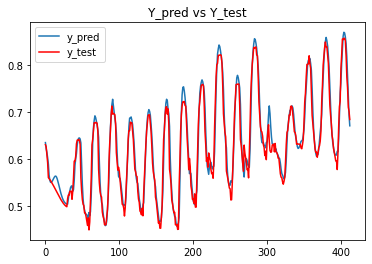

In [24]:
#Checking how much well our model predicting 
fig, ax = plt.subplots()

plt.title("Y_pred vs Y_test")
#The blue line is for y_pred wich is our model predicted data
ax.plot(y_pred,label = 'y_pred')
#THE red line is for y_test which is our original data
ax.plot(y_test,label = "y_test", c='r')
plt.legend()

In [25]:
#So its seems good that our model is predicting very much well we can increase the accuracy more by increasing the epochs but for now its totaly fine